In [77]:
# Dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
csv_path = "Resources/videos.csv"
df = pd.read_csv(csv_path)
# df.head(10)

In [79]:
# clean up data before creating dataframe for calculations
df_path = "Resources/videos.csv"
df = pd.read_csv(df_path)

df[["publish date", "asdf"]] = df["publish_time"].str.split(pat="T", n=1, expand=True)


df[["publish time", "trash"]] = df["asdf"].str.split(pat=".", n=1, expand=True)


df["publish date"] = pd.to_datetime(df["publish date"])
df["publish_date"] = df["publish date"].dt.strftime('%m/%d/%Y')


category_json_path = "Resources/US_category_id.json"
category_dict = {'category_id': [], 'Category': []}
indexer = 0

with open(category_json_path) as json_data:
  data = json.load(json_data)

items = data['items']
items

for item in items:
    
    category_dict['category_id'].append(data['items'][indexer]['id'])
    category_dict['Category'].append(data['items'][indexer]['snippet']['title'])
    indexer = indexer + 1
        


category_df = pd.DataFrame(category_dict)
category_df["category_id"] = category_df["category_id"].astype(int)
df = df.merge(category_df, how='inner', on='category_id')



df["trending_date"]=pd.to_datetime(df["trending_date"].astype(str), format="%y.%d.%m")
df["trending_date"] = df["trending_date"].dt.strftime("%m/%d/%Y")
#df.head()

In [80]:
# clean up data frame for only columns we want to work with
df = df[["video_id", "title", "channel_title", "Category", "publish time", "publish_date", "trending_date", "views", "likes", "dislikes", "tags", "comments_disabled"]]
# df.head()

In [81]:
# data frame with rows for last trending date
last_df = df[['video_id', 'trending_date']]
last_df = last_df.groupby('video_id').max()
last_df = last_df.reset_index()
last_df = last_df.merge(df, how ='left')
# last_df.head()

In [82]:
# data frame with rows for first trending date
first_df = df[['video_id', 'trending_date']]
first_df = first_df.groupby('video_id').min()
first_df = first_df.reset_index()
first_df = first_df.merge(df, how ='left')
# first_df.head(50)

In [83]:
# Mike's Code

In [84]:
# Riley's Code

In [85]:
# Jackie's Code

In [86]:
# Brian's Code

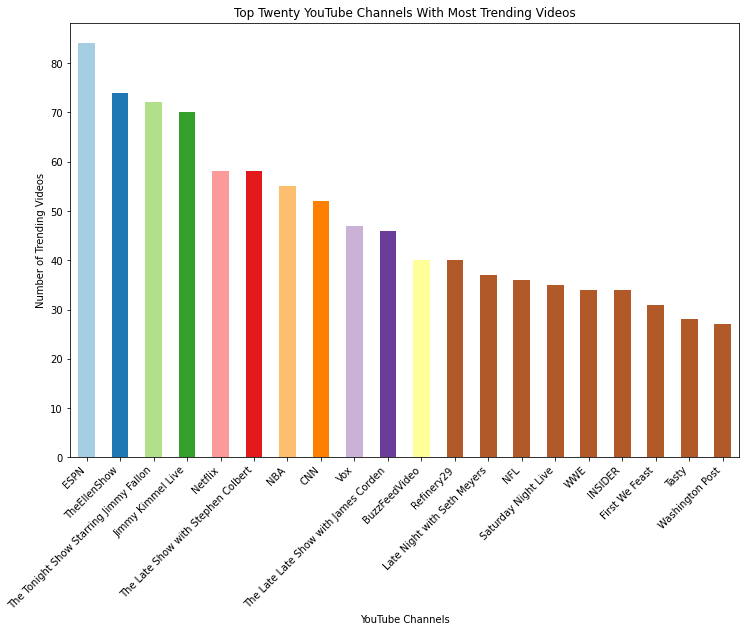

In [88]:
# Generate a bar plot showing the top 20 youtube channels with most trending videos.

# groupby video_id using count and channel_title
vids_per_title_df = last_df[["video_id", "channel_title"]]
# vids_per_title_df.head()

vids_per_title_df = vids_per_title_df.groupby("channel_title").count()
# len(vids_per_title_df)
# vids_per_title_df.head()

vids_per_title_df = vids_per_title_df.sort_values(by = 'video_id', ascending = False)
# vids_per_title_df.head()

# plot a bar chart
# vids_per_title_df.head(20).plot(kind="bar", figsize=(12,8), color = "b", legend=False)
vids_per_title_df.head(20).plot(kind="bar", figsize=(12,8), color = [plt.cm.Paired(np.arange(len(vids_per_title_df)))], legend=False)

# title
plt.title("Top Twenty YouTube Channels With Most Trending Videos")
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("YouTube Channels")
plt.ylabel("Number of Trending Videos")

plt.show()
# plt.tight_layout()

In [89]:
#this is my test cell to merge